In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import time
from sklearn.metrics import accuracy_score,  f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import random
import time
%matplotlib inline

In [2]:
random.seed(1438642)
df = pd.read_csv("train.csv")
patient_number = pd.read_csv("actual.csv")
patient_number.columns = ["index","cancer_type"]
test = pd.read_csv("test.csv")

In [3]:
columns_names = [col for col in df.columns if "call" not in col]
df1 = df[columns_names]
df2 = df1.drop(["Gene Description","Gene Accession Number"],axis=1)
df2  = df2.T

df2 = df2.reset_index()
df2["index"] = pd.to_numeric(df2["index"])
df2 = df2.sort_values("index")

df2  = pd.merge(df2, patient_number, on='index', how='inner')
df2.loc[df2.cancer_type=="ALL","cancer_type"] = 0
df2.loc[df2.cancer_type=="AML","cancer_type"] = 1
df2 = df2.sample(frac=1).drop(["index"],axis=1)

In [4]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer_type
7,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,629,-86,302,23,1799,446,59,781,20,0
5,-138,-85,215,71,-272,-558,67,-186,87,193,...,1221,-76,172,-74,645,341,26,193,-53,0
25,-112,-233,-78,54,-244,-275,-479,-108,136,-86,...,678,77,2527,-36,838,313,21,145,-19,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
20,-144,-199,-157,132,-151,-347,-118,-24,126,-201,...,595,-12,36,26,208,113,-8,22,-22,0


In [5]:
columns_names_test = [col for col in test.columns if "call" not in col]
test1 = test[columns_names_test]
test2 = test1.drop(["Gene Description","Gene Accession Number"],axis=1)
test2  = test2.T
test2 = test2.reset_index()
test2["index"] = pd.to_numeric(test2["index"])
test2 = test2.sort_values("index")
test2  = pd.merge(test2, patient_number, on='index', how='inner')

test2.loc[test2.cancer_type=="ALL","cancer_type"] = 0
test2.loc[test2.cancer_type=="AML","cancer_type"] = 1

test2 = test2.sample(frac=1).drop(["index"],axis=1)


In [8]:
lis = [SVM_accuracy*100,SVM_computation_time]
lis2= [NB_accuracy*100,NB_computation_time]

Time to compute PCA 0.07280778884887695


Text(0.5, 1.0, 'Almost 99% Variablity explained by 70 Variables')

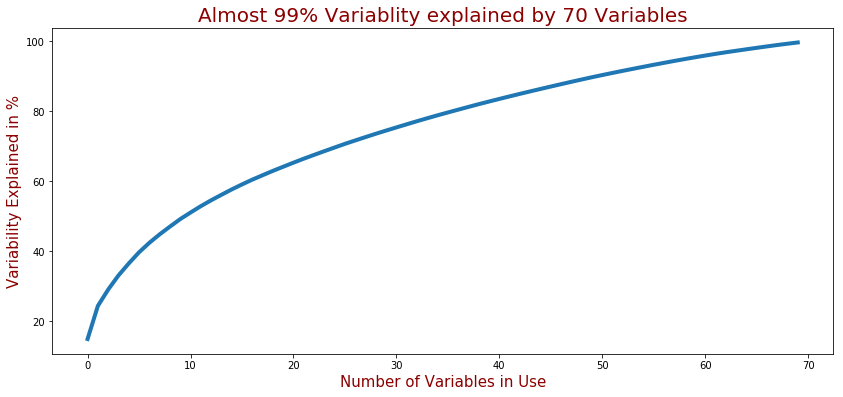

In [10]:
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()
# Normalizing the full dataframe
new = pd.concat([df2,test2],axis=0)
standard = StandardScaler()
result = standard.fit_transform(new.iloc[:,0:new.shape[1]])
result = pd.DataFrame(result)

# PCA calculation
pca = PCA(n_components=70)
principal_comp = pca.fit_transform(result)
pca_time = time.time()-start_time


principal_comp = pd.DataFrame(principal_comp)
explanation = pca.explained_variance_ratio_
cummulative_sum = explanation.cumsum()

print("Time to compute PCA {}".format(pca_time))


plt.figure(figsize=(14,6))
plt.plot(cummulative_sum*100,linewidth=4)
plt.xlabel("Number of Variables in Use",size=15,color="darkred")
plt.ylabel("Variability Explained in %",size=15,color="darkred")
plt.title("Almost 99% Variablity explained by 70 Variables",size=20,color="darkred")




In [11]:
y_col = pd.concat([df2.cancer_type,test2.cancer_type],axis=0)
principal_comp = pd.DataFrame(principal_comp)
principal_comp = pd.concat([principal_comp,y_col.reset_index()],axis=1).drop("index",axis=1)
train_x,test_x,train_y,test_y = train_test_split(principal_comp.iloc[:,0:principal_comp.shape[1]],principal_comp.cancer_type,test_size=0.25)

In [12]:
# SVM model after PCA
com_time_laps=[]
for i in range(100):
    start_time = time.time()
    clf2 = svm.SVC()
    clf2.fit(train_x,train_y)
    accuracy = accuracy_score(clf2.predict(test_x),test_y) * 100
    accuracy=round(accuracy)
    time_laps_after_pca = time.time() - start_time
    com_time_laps.append(time_laps_after_pca)
print("The accuracy is {} and computaiton time is {} \nNeeds Improvement in accuracy".format(accuracy,np.mean(com_time_laps)))
lis = [accuracy,np.mean(com_time_laps)]

The accuracy is 56.0 and computaiton time is 0.0016859245300292968 
Needs Improvement in accuracy


In [14]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,cancer_type
42,-35.879539,-24.886994,-4.439284,5.864173,11.497737,5.629883,-7.234801,-3.280285,6.945588,8.925604,...,-0.498249,-8.309630,-4.756526,-8.250519,-1.508260,0.324251,-6.990638,-6.477337,1.980686,1
1,-3.464062,-14.734264,-6.865041,-18.197032,-28.374458,19.866556,-6.226524,-0.758983,1.945081,5.595913,...,0.222316,-1.249283,0.111763,3.917917,-2.811725,1.575506,2.124210,-3.240735,-5.440612,0
16,30.534266,-12.078866,44.163804,18.267571,9.172892,9.618195,-27.306792,24.764898,-3.362558,-7.412030,...,0.710107,0.962291,0.245165,1.684544,-1.102387,-1.262609,0.041162,0.113322,1.800376,1
5,20.448856,-4.269841,25.591083,-7.807029,-0.213844,-9.252650,-4.765101,2.443633,10.137011,-0.616953,...,-2.174904,-3.566783,-3.736790,-0.317351,0.226164,0.562714,-0.201506,-2.115726,0.470306,1
7,-6.685022,15.633233,11.761125,-17.105181,-21.448219,0.421187,-11.959689,-7.068862,23.411965,-6.123433,...,-18.493588,4.812996,-4.765276,2.197920,1.929370,-0.604597,0.354382,-0.704925,1.059445,0


In [15]:
start_time = time.time()
nv2 = GaussianNB()
nv2.fit(train_x.iloc[:,0:train_x.shape[1]-1],train_y)
time_laps = time.time()-start_time
a = accuracy_score(nv2.predict(test_x.iloc[:,0:test_x.shape[1]-1]),test_y)*100
naive_bayse = round(a)

lis2=[naive_bayse,time_laps]

In [16]:
cross_tab = pd.DataFrame(lis,lis2)
cross_tab.reset_index(inplace=True)
cross_tab.columns=("Naive Bayes","SVM")
cross_tab.index=("Accuracy","Computation time")
print("    Metric with 72 columns")
cross_tab

    Metric with 72 columns


,Naive Bayes,SVM
Accuracy,83.000000,56.000000
Computation time,0.001996,0.001686


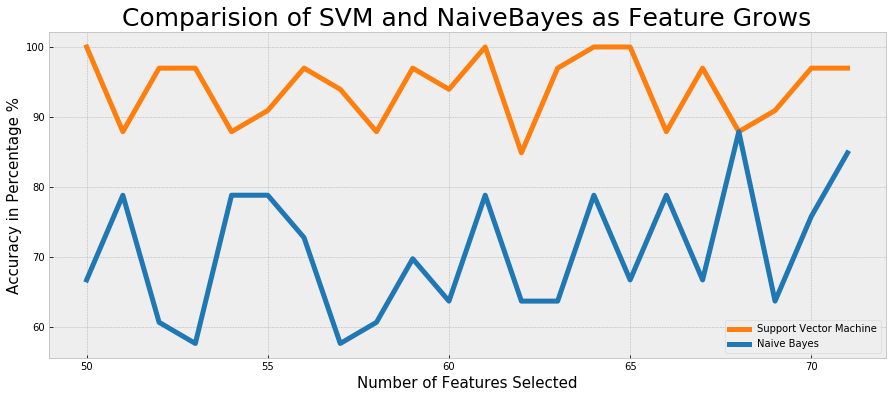

In [30]:
acc = []
acc_nb = []
f1_svm = []
f1_nb = []
for i in range(50,72):
    pca = PCA(n_components=i)
    principal_comp = pca.fit_transform(result)
    principal_comp = pd.DataFrame(principal_comp)
    y_col = pd.concat([df2.cancer_type,test2.cancer_type],axis=0)
    principal_comp = pd.DataFrame(principal_comp)
    principal_comp = pd.concat([principal_comp,y_col.reset_index()],axis=1).drop("index",axis=1)

    #SVM
    train_x,test_x,train_y,test_y = train_test_split(principal_comp.iloc[:,0:(principal_comp.shape[1]-1)],principal_comp.cancer_type,test_size=0.45)
    
    clf2 = svm.SVC(kernel='linear',gamma="auto",C=0.001)
    clf2.fit(train_x,train_y)
    a = accuracy_score(clf2.predict(test_x),test_y) * 100
    
    f1_ = f1_score(test_y, clf2.predict(test_x))
    f1_svm.append(f1_)
    
    
    #NB
    nv2 = GaussianNB()
    nv2.fit(train_x,train_y)
    b = accuracy_score(nv2.predict(test_x),test_y) *100
    
    f1 = f1_score(test_y, clf2.predict(test_x))
    f1_nb.append(f1)

    acc.append(a)
    acc_nb.append(b)
    
    
plt.figure(figsize=(15,6))
plt.plot(range(50,72),acc,'#ff7f0e',range(50,72),acc_nb,'#1f77b4',linewidth=5)
plt.legend(["Support Vector Machine","Naive Bayes"],loc="best")
plt.xlabel("Number of Features Selected",size=15)
plt.ylabel("Accuracy in Percentage %",size=15)
plt.title("Comparision of SVM and NaiveBayes as Feature Grows",size=25)
plt.style.use("bmh")

In [49]:
#hyper parameter at var=72
from sklearn.metrics import f1_score

kernel=["linear","poly","rbf","sigmoid"]
cost = [.001,.01,.1,1,10,100,1000]

m = []
f= []

for k in kernel:
    ker = k
    for c in cost:
        cos = c
        accu=[]
        f1_scores = []
        
        for i in range(10):
            train_x,test_x,train_y,test_y = train_test_split(principal_comp.iloc[:,0:(principal_comp.shape[1]-1)],principal_comp.cancer_type,test_size=0.45)
            clf2 = svm.SVC(kernel=ker,gamma="auto",C=cos)
            clf2.fit(train_x,train_y)
            a = accuracy_score(clf2.predict(test_x),test_y)             
            accu.append(a)
            
            from sklearn.metrics import f1_score
            f1 = f1_score(test_y,clf2.predict(test_x),average='weighted')
            f1_scores.append(f1)
            
        means = np.mean(accu)
        f1_means = np.mean(f1_scores)
        f.append(f1_means)
        m.append(means)     
        print(" {} kernel,  penalty = {}, accuacy = {}, f1_score = {} ".format(k,c,round(means*100,2),f1_means))
        time.sleep(.3)

 linear kernel,  penalty = 0.001, accuacy = 91.82, f1_score = 0.9118637229337236 
 linear kernel,  penalty = 0.01, accuacy = 95.76, f1_score = 0.9563507118245604 
 linear kernel,  penalty = 0.1, accuacy = 93.94, f1_score = 0.9375882962750209 
 linear kernel,  penalty = 1, accuacy = 97.27, f1_score = 0.9722263536298079 
 linear kernel,  penalty = 10, accuacy = 95.76, f1_score = 0.9566267907176998 
 linear kernel,  penalty = 100, accuacy = 96.67, f1_score = 0.9655832194398425 
 linear kernel,  penalty = 1000, accuacy = 92.42, f1_score = 0.9208278526043976 
 poly kernel,  penalty = 0.001, accuacy = 70.0, f1_score = 0.58967337041437 
 poly kernel,  penalty = 0.01, accuacy = 67.58, f1_score = 0.5568439147329428 
 poly kernel,  penalty = 0.1, accuacy = 64.85, f1_score = 0.5262760113342446 
 poly kernel,  penalty = 1, accuacy = 68.79, f1_score = 0.5711015075215079 
 poly kernel,  penalty = 10, accuacy = 60.91, f1_score = 0.47670246295583213 
 poly kernel,  penalty = 100, accuacy = 66.97, f1_s